In [1]:
%cd /home/pac/gits/phd/mri-online/

/home/pac/gits/phd/mri-online


In [2]:
import os
import time
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy as sp
import tikzplotlib as tikz
from project_utils import implot, imsave, load_data
from online.metrics import psnr_ssos, ssim_ssos, ssos

/home/pac/gits/phd/pysap-mri/mri/operators/fourier/non_cartesian.py:42: UserWarning: gpuNUFFT python package has not been found. If needed please check on how to install in README
  warnings.warn("gpuNUFFT python package has not been found. If needed "


In [3]:
DATA_DIR = "data/"
PLOT_DIR = "plots/"
RESULT_DIR = "data/results/"
N_JOBS = 1

In [4]:
def save_fig(f, name,clean=True):
    if clean:
        tikz.clean_figure(f)
    tikz.save(PLOT_DIR+name+'.tikz', f,override_externals=True, axis_width="\\mywidth",axis_height="\\myheight")

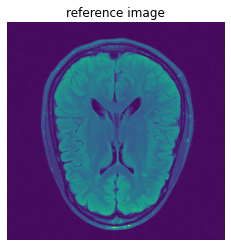

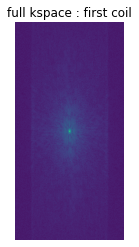

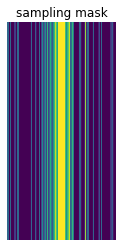

In [5]:
full_k, real_img, mask_loc, final_mask = load_data(DATA_DIR,2, monocoil=True)
square_mask= np.zeros(real_img.shape)
real_img_size = real_img.shape
img_size = [min(real_img.shape)]*2
square_mask[real_img_size[0] // 2 - img_size[0] // 2:real_img_size[0] // 2 + img_size[0] // 2,
            real_img_size[1] // 2 - img_size[1] // 2:real_img_size[1] // 2 + img_size[1] // 2] = 1


# use mono-coil data
final_k = full_k * final_mask
imsave(real_img, PLOT_DIR+'ground_truth.png',mask=square_mask)
imsave(np.sqrt(np.sqrt(np.abs(full_k))), PLOT_DIR+'kspace_full.png')
imsave(final_mask, PLOT_DIR+'mask.png')

f = implot(real_img, "reference image",mask=square_mask)
f.savefig('gt_image.png',dpi=200,bbox_inches='tight')
!mogrify -trim gt_image.png
f = implot(np.sqrt(np.sqrt(np.abs(full_k))), "full kspace : first coil")
f = implot(final_mask, "sampling mask")

K_DIM = final_mask.shape
N_COILS = 1

In [6]:
import yaml
import pprint
import matplotlib as mpl
# Use the pgf backend (must be done before import pyplot interface)
mpl.use('pgf')
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import tikzplotlib as tikz
from results.base import Experience, loader
from results.plot import plot_metrics, plot_line, make_gif

from project_utils import implot, imsave, load_data
from online.metrics import psnr_ssos, ssim_ssos, ssos

In [18]:
with open('results/tested_config.yml') as f:
    tested_cfg = yaml.load(f, Loader=loader)
Experience.save_folder = 'results/simuls/'
Experience.objects.flush()
for cfg in tested_cfg:
    Experience.objects.add(Experience(**cfg))
    
multicoil= Experience.objects.filter(mode='and',data__monocoil=False)
exp = Experience.objects.get(mode='and', problem__fourier_type=1, problem__regularisation__class='GroupLASSO',
                            problem__regularisation__weights=2e-6,
                            solver__algo="fista")
print(exp)
xf = exp.xf
print(len(xf))
print(xf[0].shape)

{"data": {"data_idx": 1, "monocoil": false}, "problem": {"fourier_type": 1, "linear": {"class": "WaveletN", "nb_scale": 4, "wavelet_name": "sym8"}, "regularisation": {"class": "GroupLASSO", "weights": 2e-06}}, "solver": {"algo": "fista", "nb_run": 1}}
17
(16, 640, 320)
